# Import Library

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
import shutil

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Path ke dataset
train_path = "/content/drive/My Drive/PCD/Ambulance_Car/Train"
label_path = "/content/drive/My Drive/PCD/Ambulance_Car/Label"

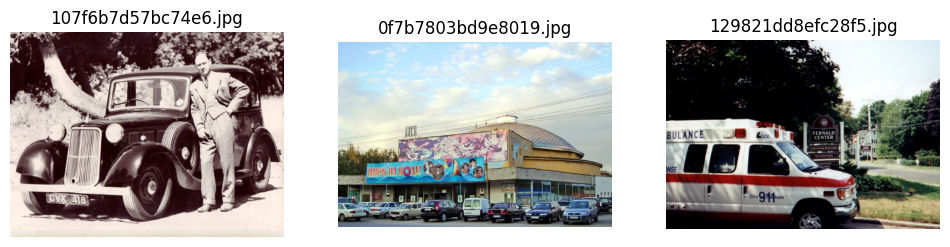

In [7]:
# Sampel citra asli (mentah) untuk masing-masing kelas.

def plot_sample_images(directory, num_images=3):
    """Plots sample images from a directory.

    Args:
      directory: The path to the directory containing the images.
      num_images: The number of images to plot.
    """
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    num_images_to_show = min(num_images, len(image_files))

    plt.figure(figsize=(12, 4))
    for i in range(num_images_to_show):
        image_path = os.path.join(directory, image_files[i])
        try:
          img = mpimg.imread(image_path)
          plt.subplot(1, num_images_to_show, i + 1)
          plt.imshow(img)
          plt.title(image_files[i])
          plt.axis('off')
        except Exception as e:
          print(f"Error loading image {image_path}: {e}")
    plt.show()

# Menampilkan sampel citra dari direktori train
plot_sample_images(train_path)

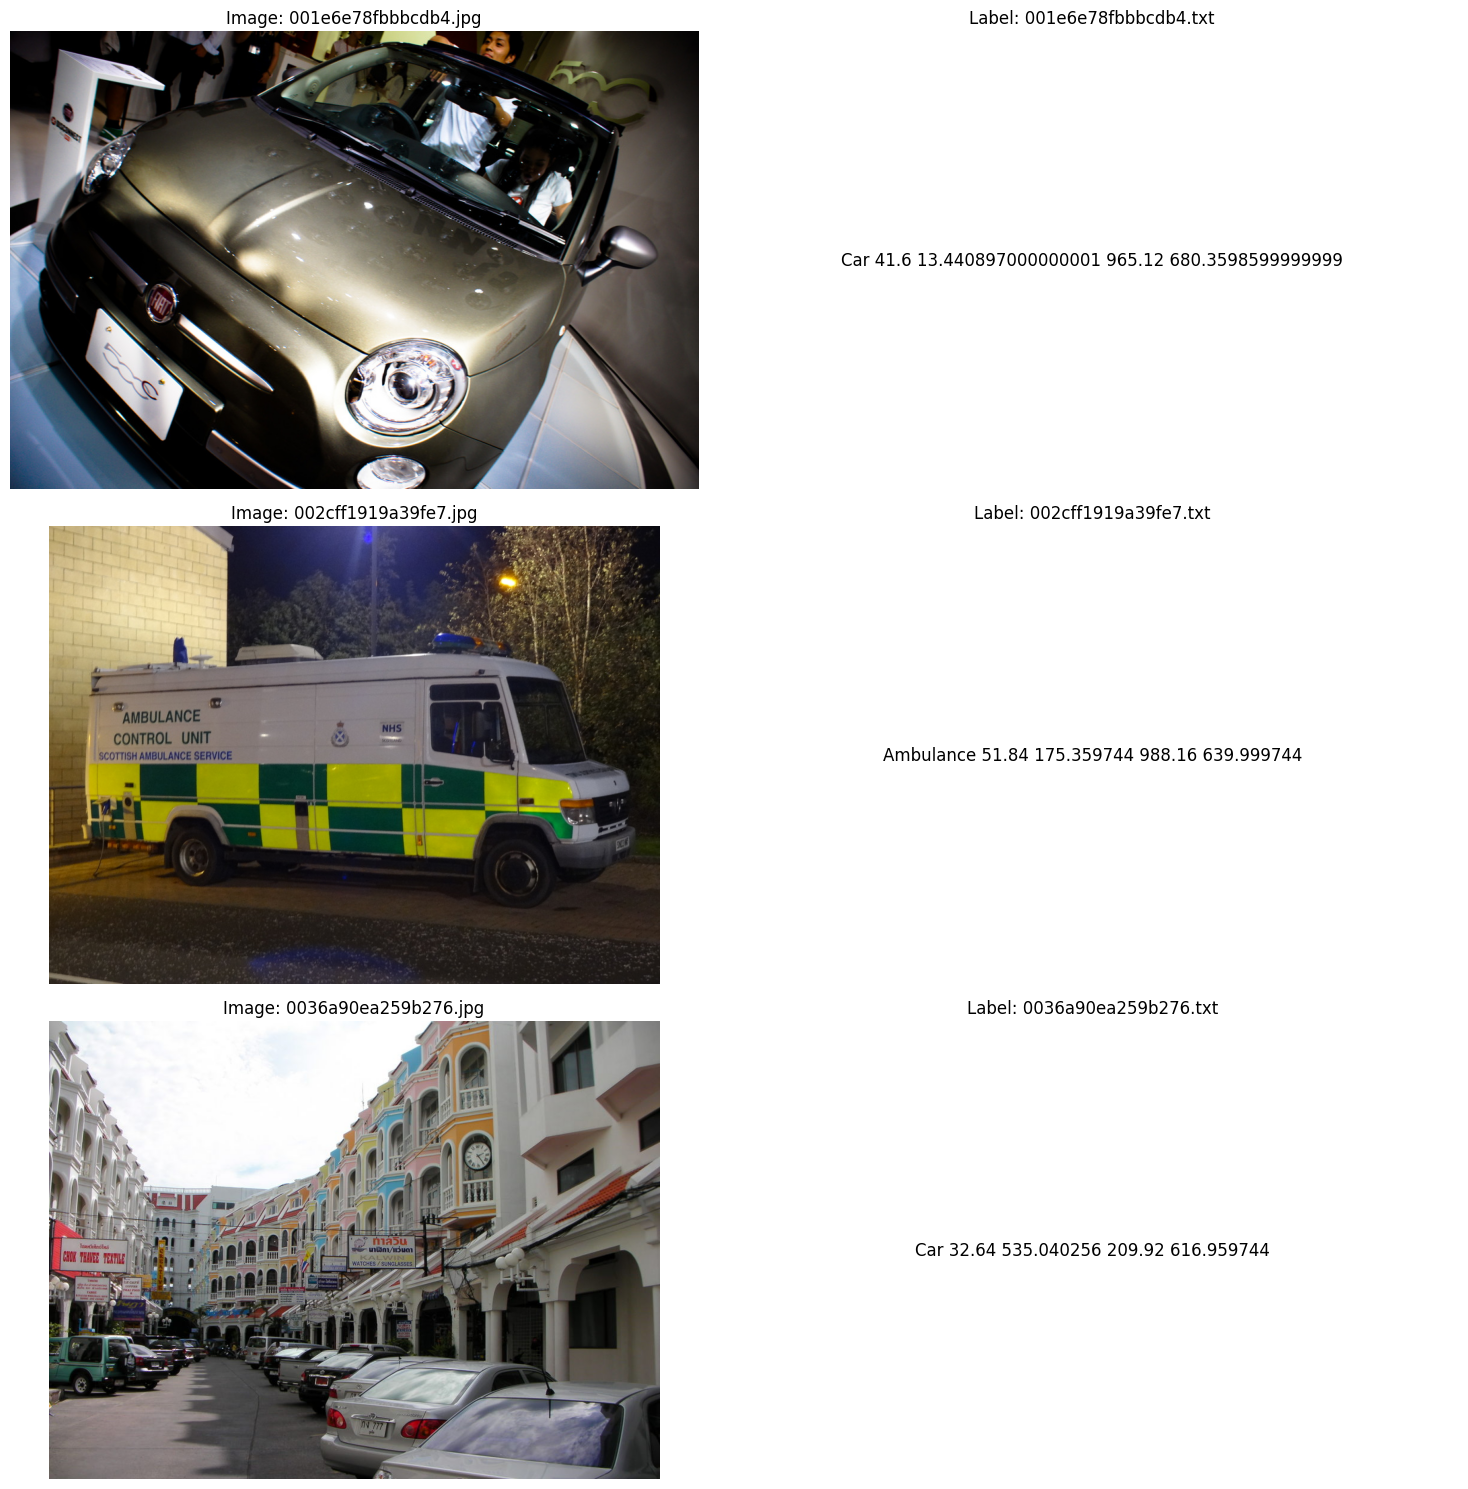

In [8]:
# sesuaikan 3 gambar dengan label nya dengan rapih
def plot_images_with_labels(train_dir, label_dir, num_images=3):
    """Plots sample images with their corresponding labels.

    Args:
      train_dir: Path to the directory containing training images.
      label_dir: Path to the directory containing labels (text files).
      num_images: The number of images to display.
    """

    image_files = sorted([f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))])
    label_files = sorted([f for f in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, f))])

    num_images_to_show = min(num_images, len(image_files), len(label_files))

    plt.figure(figsize=(15, 5 * num_images_to_show)) # Adjust figure size

    for i in range(num_images_to_show):
        image_path = os.path.join(train_dir, image_files[i])
        label_path = os.path.join(label_dir, label_files[i])

        try:
            img = mpimg.imread(image_path)
            with open(label_path, 'r') as f:  # Read label from corresponding file
                label = f.readline().strip() # Assuming one label per line

            plt.subplot(num_images_to_show, 2, 2*i + 1)  # Subplot for image
            plt.imshow(img)
            plt.title(f"Image: {image_files[i]}")
            plt.axis('off')

            plt.subplot(num_images_to_show, 2, 2*i + 2)  # Subplot for label
            plt.text(0.5, 0.5, label, ha='center', va='center', fontsize=12)
            plt.title(f"Label: {label_files[i]}")
            plt.axis('off')

        except Exception as e:
            print(f"Error processing image/label {image_files[i]}: {e}")

    plt.tight_layout()
    plt.show()

# Check if directories exist
if not os.path.exists(train_path) or not os.path.exists(label_path):
    print(f"Error: Train or label directory not found.")
else:
    plot_images_with_labels(train_path, label_path)

In [9]:
# rename gambar sesuai label
new_train_path = "/content/drive/My Drive/PCD/Ambulance_Car/Renamed_Train"


def rename_images_with_labels(train_dir, label_dir, new_train_dir):
    """Renames images based on their corresponding labels, simplifying to 'car' or 'ambulance'.

    Args:
      train_dir: Path to the directory containing training images.
      label_dir: Path to the directory containing labels (text files).
      new_train_dir: Path to the directory where renamed images will be saved.
    """
    image_files = sorted([f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))])
    label_files = sorted([f for f in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, f))])

    # Create the new directory if it doesn't exist
    os.makedirs(new_train_dir, exist_ok=True)

    num_files = min(len(image_files), len(label_files))

    for i in range(num_files):
        image_path = os.path.join(train_dir, image_files[i])
        label_path = os.path.join(label_dir, label_files[i])

        try:
            with open(label_path, 'r') as f:
                label = f.readline().strip()
                # Simplify labels
                label = "car" if "car" in label.lower() else "ambulance"


            # Extract file extension from original name
            _, ext = os.path.splitext(image_files[i])

            # Construct new filename
            new_filename = f"{label}_{i}{ext}"  # Add an index for uniqueness
            new_image_path = os.path.join(new_train_dir, new_filename)

            # Copy and rename the file
            shutil.copy2(image_path, new_image_path)  # shutil.copy2 preserves metadata

            print(f"Renamed '{image_files[i]}' to '{new_filename}'")
        except Exception as e:
            print(f"Error processing image/label {image_files[i]}: {e}")

# Check if directories exist
if not os.path.exists(train_path) or not os.path.exists(label_path):
    print(f"Error: Train or label directory not found.")
else:
    rename_images_with_labels(train_path, label_path, new_train_path)

Renamed '001e6e78fbbbcdb4.jpg' to 'car_0.jpg'
Renamed '002cff1919a39fe7.jpg' to 'ambulance_1.jpg'
Renamed '0036a90ea259b276.jpg' to 'car_2.jpg'
Renamed '0037710c3d02f369.jpg' to 'car_3.jpg'
Renamed '003f00b07e582283.jpg' to 'car_4.jpg'
Renamed '00510a8d1b746d21.jpg' to 'ambulance_5.jpg'
Renamed '0053860714da4340.jpg' to 'ambulance_6.jpg'
Renamed '008fb317eb17858b.jpg' to 'ambulance_7.jpg'
Renamed '009ba461026271c3.jpg' to 'ambulance_8.jpg'
Renamed '00aeb6aad375b581.jpg' to 'car_9.jpg'
Renamed '00b83a965bfdf05c.jpg' to 'ambulance_10.jpg'
Renamed '00cf36607bf15e80.jpg' to 'ambulance_11.jpg'
Renamed '00dea1edf14f09ab.jpg' to 'ambulance_12.jpg'
Renamed '00e0422e47cdbeb7.jpg' to 'ambulance_13.jpg'
Renamed '00e2d9121adc0c20.jpg' to 'ambulance_14.jpg'
Renamed '00ebe911feb4244e.jpg' to 'ambulance_15.jpg'
Renamed '00fbeea1df0767a8.jpg' to 'car_16.jpg'
Renamed '014c195652f21f2c.jpg' to 'car_17.jpg'
Renamed '0156edf0f33e59d3.jpg' to 'car_18.jpg'
Renamed '0158307c4ad94b38.jpg' to 'ambulance_19.jpg

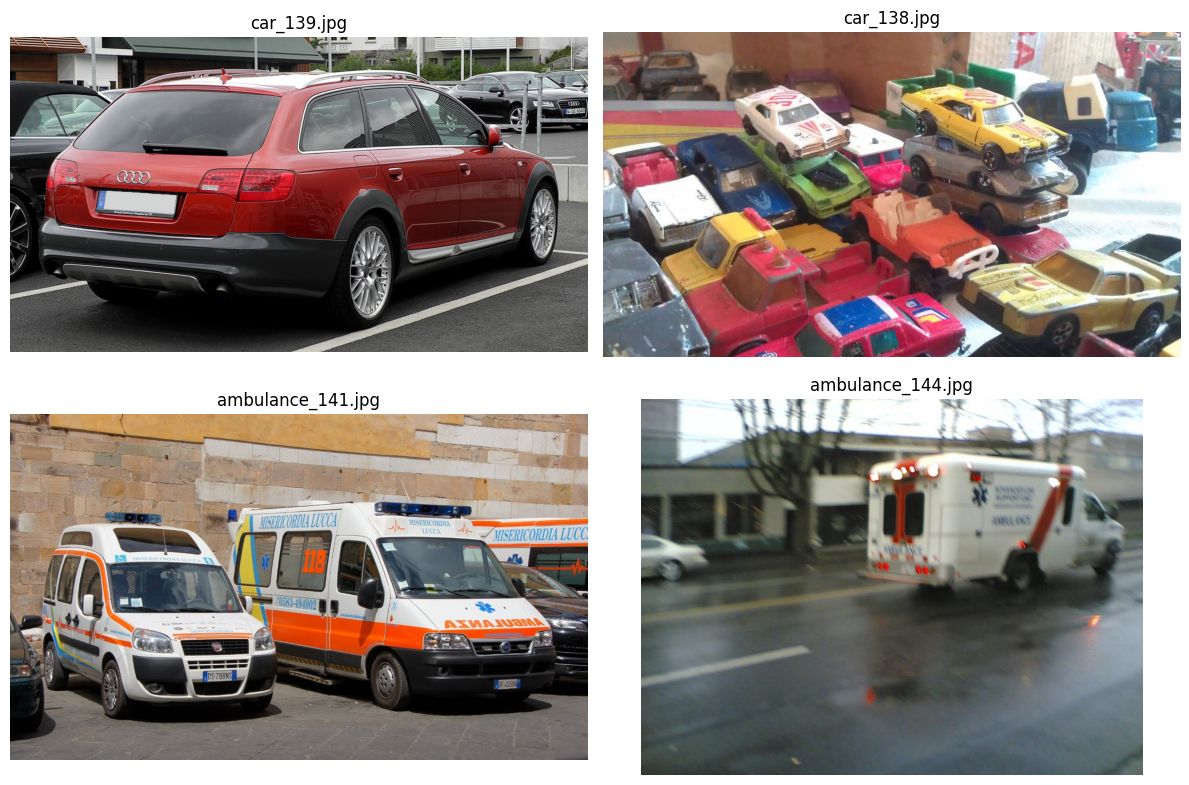

In [10]:
# Sampel citra asli (mentah) untuk masing-masing kelas.

# Path ke dataset (ganti dengan path yang sesuai)
train_path = "/content/drive/My Drive/PCD/Ambulance_Car/Renamed_Train"

def plot_images(directory, num_images=4):
    """Plots specified number of images from a directory."""
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    num_images_to_show = min(num_images, len(image_files))

    plt.figure(figsize=(12, 8))  # Adjust figure size as needed
    for i in range(num_images_to_show):
        image_path = os.path.join(directory, image_files[i])
        try:
            img = mpimg.imread(image_path)
            plt.subplot(2, 2, i + 1)  # 2x2 grid for 4 images
            plt.imshow(img)
            plt.title(image_files[i])
            plt.axis('off')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
    plt.tight_layout()
    plt.show()

# Menampilkan 2 mobil dan 2 ambulance
car_count = 0
ambulance_count = 0
image_files = [f for f in os.listdir(train_path) if os.path.isfile(os.path.join(train_path,f))]
selected_images = []

for image_file in image_files:
    if "car" in image_file.lower() and car_count < 2:
        selected_images.append(image_file)
        car_count += 1
    elif "ambulance" in image_file.lower() and ambulance_count < 2:
        selected_images.append(image_file)
        ambulance_count += 1

    if car_count == 2 and ambulance_count == 2:
        break

plt.figure(figsize=(12,8))
for i,image_file in enumerate(selected_images):
    image_path = os.path.join(train_path, image_file)
    try:
      img = mpimg.imread(image_path)
      plt.subplot(2,2,i+1)
      plt.imshow(img)
      plt.title(image_file)
      plt.axis("off")
    except Exception as e:
      print(f"Error loading image {image_path}: {e}")

plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of images loaded: 1138
Number of labels loaded: 1138


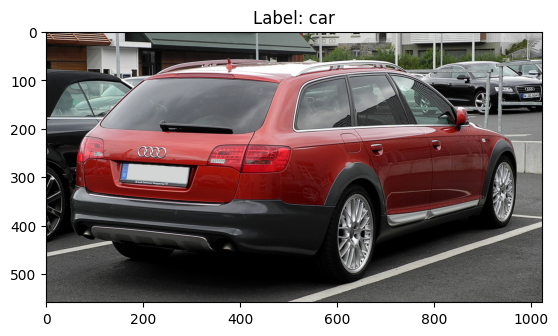

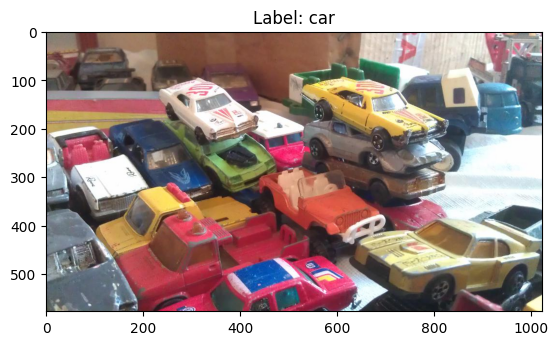

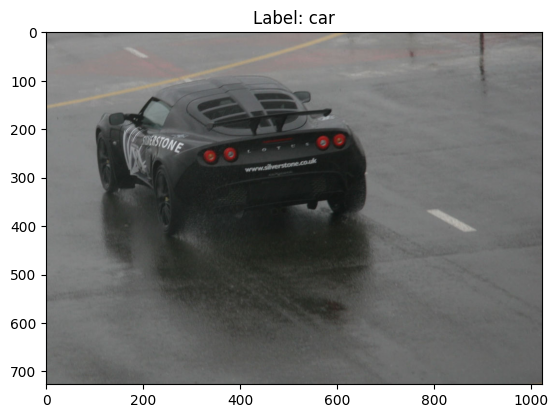

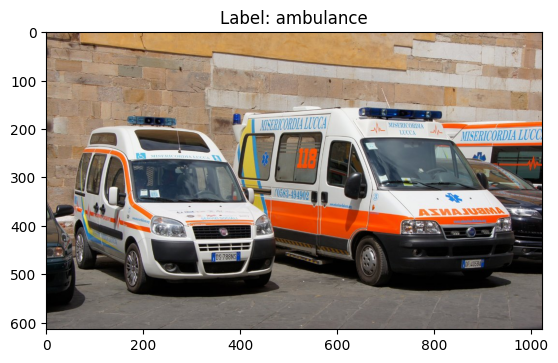

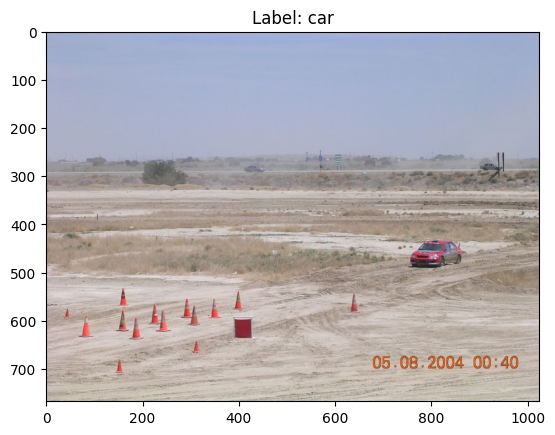

In [11]:
# akuisisi data


# Mount Google Drive (if not already mounted)
drive.mount('/content/drive')

# Path to the dataset and label directories
train_path = "/content/drive/My Drive/PCD/Ambulance_Car/Renamed_Train"


def load_images_and_labels(directory):
    """Loads images from a directory and extracts labels from filenames.

    Args:
      directory: Path to the directory containing images.

    Returns:
      images: A list of image arrays.
      labels: A list of corresponding labels.
    """

    images = []
    labels = []
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    for filename in image_files:
        try:
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if image is not None:  # Check if image loaded successfully
                images.append(image)
                label = filename.split('_')[0]  # Extract label from filename
                labels.append(label)
        except Exception as e:
            print(f"Error loading or processing image: {filename}, Error: {e}")

    return images, labels


# Load images and labels
images, labels = load_images_and_labels(train_path)

# Check if images and labels were loaded correctly
if not images or not labels:
    print("Error: No images or labels were loaded. Check your paths and data.")
else:
    # Continue with your image processing and classification
    print(f"Number of images loaded: {len(images)}")
    print(f"Number of labels loaded: {len(labels)}")

    # Example: Display the first few images
    for i in range(min(5, len(images))): # Display the first 5 images
      plt.imshow(images[i])
      plt.title(f"Label: {labels[i]}")
      plt.show()

In [12]:
# Langkah pertama yang dilakukan adalah dengan akuisisi data, yakni memperoleh dataset dalam bentuk citra digital lengkap dengan labelnya dari sumber. Data kemudian dibaca lalu dibagi menjadi data latih dan data uji. Sebanyak 20% citra digunakan untuk data uji, dan sisanya adalah data latih.

# Path ke dataset (adjust these paths if necessary)
data_dir = "/content/drive/My Drive/PCD/Ambulance_Car/Renamed_Train"

images = []
labels = []

for filename in os.listdir(data_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Add more extensions if needed
        img_path = os.path.join(data_dir, filename)
        img = cv2.imread(img_path)
        if img is not None:  # Check if image loaded successfully
            img = cv2.resize(img, (64, 64)) # Resize image
            images.append(img)

            # Extract label from filename (assuming filename format: label_index.jpg)
            label = filename.split('_')[0]
            labels.append(label)
        else:
            print(f"Error loading image: {img_path}")


images = np.array(images)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

print("Data Split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Further processing (flattening, feature extraction, model training) would go here.


Data Split:
X_train shape: (910, 64, 64, 3)
X_test shape: (228, 64, 64, 3)
y_train shape: (910,)
y_test shape: (228,)


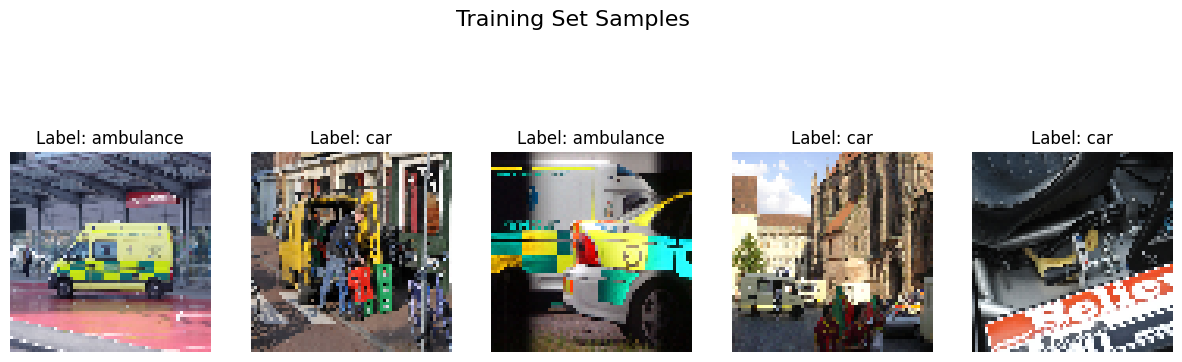

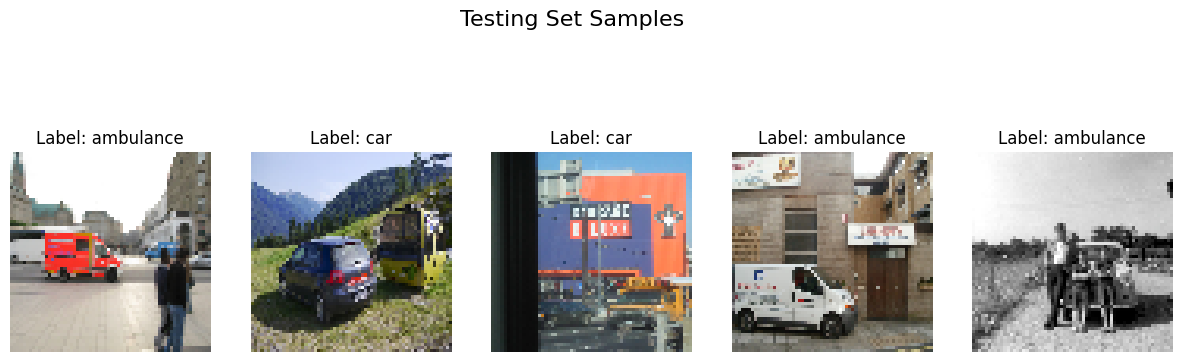

In [13]:
# Function to display images with labels
def display_images(images, labels, title, label_encoder, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        plt.title(f"Label: {label_encoder.inverse_transform([labels[i]])[0]}")
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Display a few training images
display_images(X_train, y_train, "Training Set Samples", label_encoder)

# Display a few testing images
display_images(X_test, y_test, "Testing Set Samples", label_encoder)

In [14]:
# ekualisasi histogram yang diikuti dengan median filtering dengan ukuran kernel sebesar 3, menghasilkan citra dengan kontras yang lebih baik dan derau (noise) yang tereduksi.
def enhance_image(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Could not open or read image {image_path}")
        return None

    # Histogram equalization
    equ = cv2.equalizeHist(img)

    # Median filtering
    median = cv2.medianBlur(equ, 3)

    return median

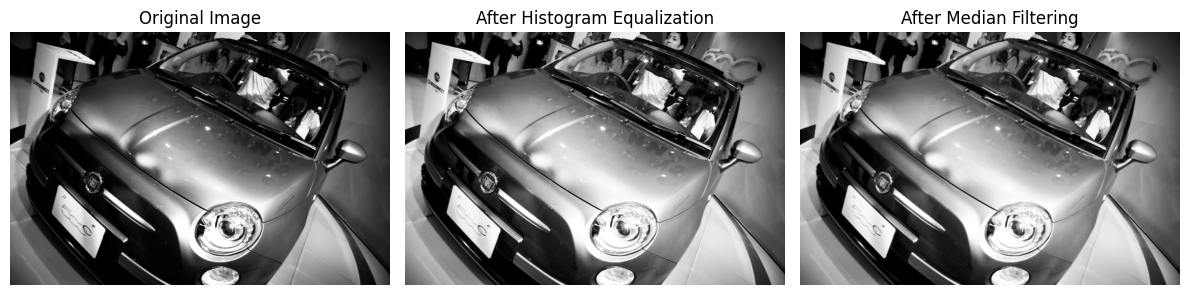

In [18]:
def enhance_image(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Could not open or read image {image_path}")
        return None

    # Histogram equalization
    equ = cv2.equalizeHist(img)

    # Median filtering
    median = cv2.medianBlur(equ, 3)

    # Show the results
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # After histogram equalization
    plt.subplot(1, 3, 2)
    plt.imshow(equ, cmap='gray')
    plt.title('After Histogram Equalization')
    plt.axis('off')

    # After median filtering
    plt.subplot(1, 3, 3)
    plt.imshow(median, cmap='gray')
    plt.title('After Median Filtering')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return median

# Example usage
image_path = "/content/drive/My Drive/PCD/Ambulance_Car/Renamed_Train/car_0.jpg"  # Replace with the actual image path
enhanced_image = enhance_image(image_path)

Processed image: car_139.jpg
Number of keypoints detected: 500


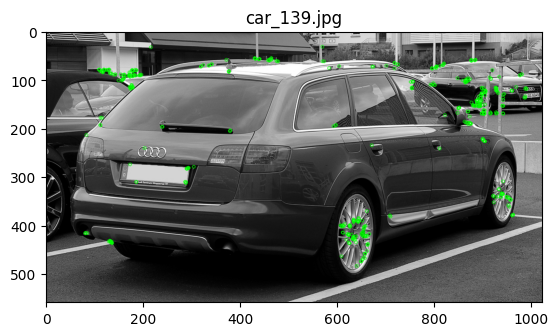

Processed image: car_138.jpg
Number of keypoints detected: 500


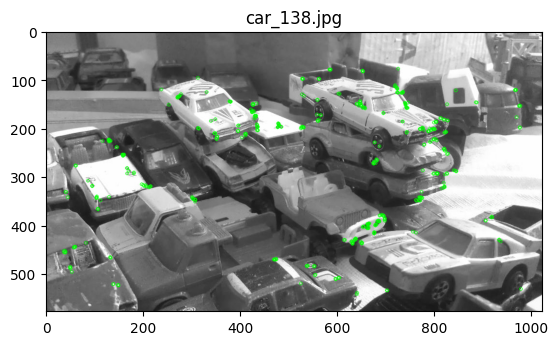

Processed image: car_140.jpg
Number of keypoints detected: 500


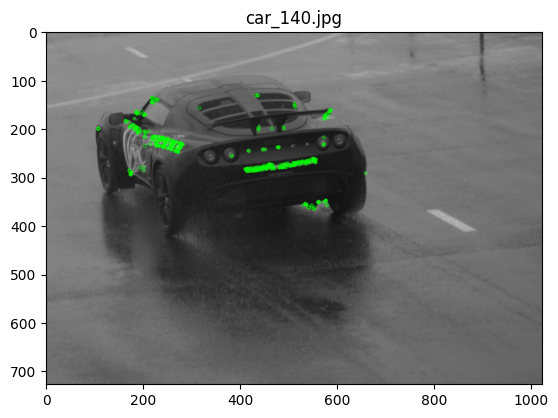

Processed image: ambulance_141.jpg
Number of keypoints detected: 500


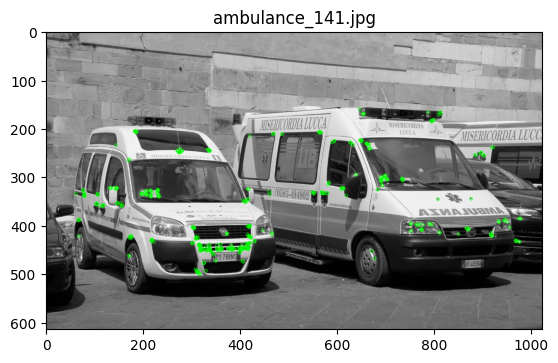

Processed image: car_143.jpg
Number of keypoints detected: 500


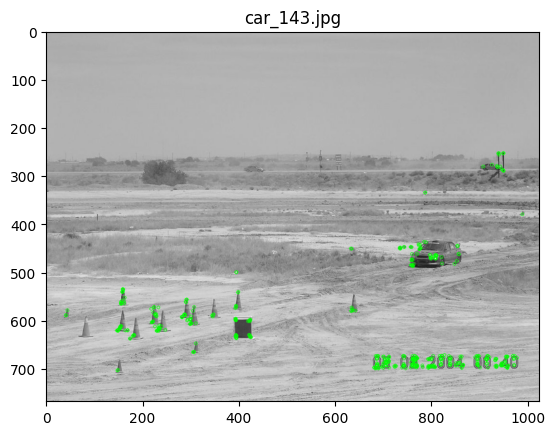

In [19]:
# Langkah selanjutnya adalah deteksi fitur menggunakan ORB (Oriented FAST and Rotated BRIEF) sebelum dilakukan proses klasifikasi citra.
def extract_orb_features(image_path):
    """
    Extracts ORB features from an image.

    Args:
        image_path: Path to the image file.

    Returns:
        A tuple containing:
            - keypoints: A list of keypoints detected in the image.
            - descriptors: A NumPy array of ORB descriptors.
            - image: The loaded image (as a NumPy array).
        Returns None if the image cannot be loaded.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not open or read image {image_path}")
        return None

    # Initialize the ORB detector
    orb = cv2.ORB_create()

    # Find the keypoints and descriptors with ORB
    keypoints, descriptors = orb.detectAndCompute(img, None)

    return keypoints, descriptors, img


# Example usage (assuming you have images in 'data_dir')
data_dir = "/content/drive/My Drive/PCD/Ambulance_Car/Renamed_Train"
image_files = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]

for filename in image_files[:5]: # Process first 5 images for demonstration
    img_path = os.path.join(data_dir, filename)
    keypoints, descriptors, image = extract_orb_features(img_path)

    if keypoints is not None:  # Check for successful feature extraction
        print(f"Processed image: {filename}")
        print(f"Number of keypoints detected: {len(keypoints)}")

        # You can now use the keypoints and descriptors for further processing
        # (e.g., matching, classification)
        # ...

        # Example: Draw keypoints on the image and display it (optional)
        img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)
        plt.imshow(img_with_keypoints), plt.title(filename)
        plt.show()

In [20]:
# Reduksi dimensi dilakukan menggunakan pendekatan bag of visual words (BoVW) dari hasil ekstraksi ciri ORB
from sklearn.cluster import KMeans

def create_bovw_features(image_paths, num_clusters=100):
    """
    Creates Bag-of-Visual-Words (BoVW) features from ORB descriptors.

    Args:
        image_paths: A list of paths to images.
        num_clusters: The number of clusters for KMeans.

    Returns:
        A NumPy array of BoVW features.
    """

    all_descriptors = []
    for image_path in image_paths:
        keypoints, descriptors, _ = extract_orb_features(image_path)
        if descriptors is not None:
            all_descriptors.append(descriptors)  # Assuming extract_orb_features returns descriptors

    # Concatenate all descriptors into a single array
    all_descriptors = np.concatenate(all_descriptors, axis=0)


    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(all_descriptors)

    bovw_features = []
    for image_path in image_paths:
      keypoints, descriptors, _ = extract_orb_features(image_path)
      if descriptors is not None:
          predicted_clusters = kmeans.predict(descriptors)
          hist, _ = np.histogram(predicted_clusters, bins=range(num_clusters + 1))
          bovw_features.append(hist)

    return np.array(bovw_features)



# Example usage:
data_dir = "/content/drive/My Drive/PCD/Ambulance_Car/Renamed_Train"
image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]

# Create BoVW features
bovw_features = create_bovw_features(image_files[:10], num_clusters=50) # Process first 10 images

print("BoVW features shape:", bovw_features.shape)

BoVW features shape: (10, 50)


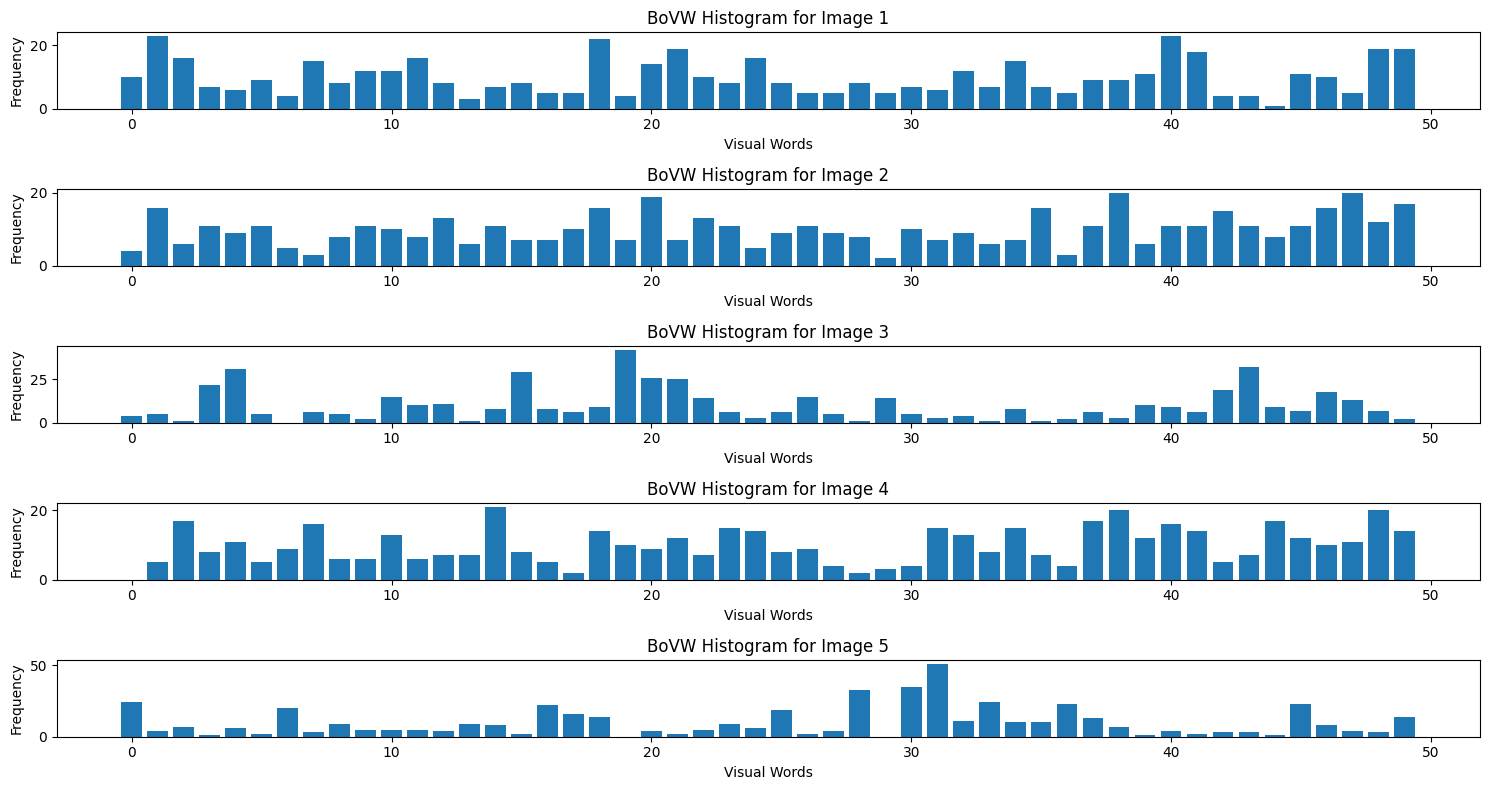

In [21]:
def plot_bovw_features(bovw_features, num_images=5):
    """
    Plots the BoVW histograms for the given images.

    Args:
        bovw_features: A NumPy array of BoVW features.
        num_images: Number of images to visualize.
    """
    plt.figure(figsize=(15, 8))

    for i in range(num_images):
        plt.subplot(num_images, 1, i + 1)  # Create a subplot for each histogram
        plt.bar(range(len(bovw_features[i])), bovw_features[i])
        plt.title(f"BoVW Histogram for Image {i + 1}")
        plt.xlabel("Visual Words")
        plt.ylabel("Frequency")
        plt.tight_layout()

    plt.show()

# Example usage after BoVW feature extraction
plot_bovw_features(bovw_features, num_images=5)  # Visualize histograms for 5 images

In [23]:
# Semua deskriptor dari setiap citra digabungkan dan dikelompokkan menjadi 200 klaster menggunakan K-Means Clustering, di mana setiap klaster merepresentasikan satu visual word. Pada setiap citra, banyaknya anggota dari masing-masing klaster akan dihitung.

def create_bovw_features(image_paths, num_clusters=200):
    """
    Creates Bag-of-Visual-Words (BoVW) features from ORB descriptors.
    Clusters descriptors into visual words using KMeans.

    Args:
        image_paths: A list of paths to images.
        num_clusters: The number of clusters (visual words).

    Returns:
        A list of BoVW histograms, one for each image.
    """

    all_descriptors = []
    for image_path in image_paths:
        keypoints, descriptors, _ = extract_orb_features(image_path)
        if descriptors is not None:
            all_descriptors.append(descriptors)

    # Handle the case where no descriptors were extracted
    if not all_descriptors:
        print("Warning: No descriptors found in any of the images.")
        return []

    all_descriptors = np.concatenate(all_descriptors, axis=0)

    # KMeans clustering to create visual words
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(all_descriptors)

    bovw_histograms = []
    for image_path in image_paths:
        keypoints, descriptors, _ = extract_orb_features(image_path)
        if descriptors is not None:
            # Predict the cluster for each descriptor
            predicted_clusters = kmeans.predict(descriptors)

            # Create a histogram of visual words
            hist, _ = np.histogram(predicted_clusters, bins=range(num_clusters + 1))
            bovw_histograms.append(hist)
        else:
            # Handle cases where no descriptors are found for an image.
            bovw_histograms.append(np.zeros(num_clusters))  # Append a zero vector
            print(f"Warning: No descriptors found for image {image_path}")

    return bovw_histograms

# Example usage (assuming 'image_files' contains a list of image paths)
data_dir = "/content/drive/My Drive/PCD/Ambulance_Car/Renamed_Train"
image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]
bovw_histograms = create_bovw_features(image_files)

# Now bovw_histograms contains a list of histograms, each representing an image.
print(f"Number of images processed: {len(bovw_histograms)}")
for i, hist in enumerate(bovw_histograms):
    print(f"Image {i+1}: {hist}") #Example: print histogram for each image


Streaming output truncated to the last 5000 lines.
  1  2  0  1  2  1  3  2  3  0  1  2  6  3  7  2  1  1  7  4  1  0  3  4
 11  6  6  2  0  1  1  3]
Image 553: [ 0  2  0  3  0  4  4  4  8  0  6  2  3  2  1  2  4  0  0  6  3  1  1  1
  1  2  3  3  3  3  2  7  5  9  0  0  6  2  1  1  2  1  1  2  0  5  2  1
  3  2  2  1  2  2  1  1  5  4  0  1  1  1  6  0  0  4  6  1  2  1  1 20
  6  1  1  2  1  1  2  1  2  7  2  0  2  1  0  0  8  5  4  4  4  2  5  0
  2  1  1  1  1  9  2  0  2  3  2  7  3  1  0  4  2  1  2  1  5 10  1  0
  3  0  3  0  1  4  2  6  6  2  4  1  0  2  0  1  0  1  2  1  3  6  3  0
  2  1  3  4  0  0  6  7  5  0  1  2  2  2  1  0  0  4  2  1  2  1  4  4
  0  2  1  2  3  3  4  5  1  0  1  1  2  1  0  0  5  5  1  4  6 12  0  0
  7  3  4  1  2  3  4  4]
Image 554: [ 0  4  2  3  0  2  1  0  5  2  1 12  5  0  1  0  5  0  4  3  4  2  0  3
  0  0  3  5  5 20  2  0 11 17  1  1  3  7  1  0  2  0  1  0  2  2  1  2
  1  2  1  0  4  1  3  0  6  0  1  0  0  0  5  0  0 13  2  0  6  0  0 12

In [24]:
# masukan untuk model supervised learning SVM dalam tugas klasifikasi gambar.
# Assuming 'bovw_histograms' contains the BoVW features and 'labels' contains the corresponding labels
# Create features and labels
X = np.array(bovw_histograms)
y = labels_encoded #Use labels_encoded

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='linear')  # You can experiment with different kernels
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.618421052631579
              precision    recall  f1-score   support

           0       0.38      0.21      0.27        77
           1       0.67      0.83      0.74       151

    accuracy                           0.62       228
   macro avg       0.53      0.52      0.51       228
weighted avg       0.57      0.62      0.58       228



In [25]:
# kernel yang digunakan dalam eksperimen ini mencakup radial basis function (RBF), polinomial, dan linear.

# Define the kernels to be used
kernels = ['rbf', 'poly', 'linear']

# Iterate through the kernels and train/evaluate the SVM for each kernel
for kernel in kernels:
    print(f"Training and evaluating SVM with {kernel} kernel:")

    # Train an SVM classifier with the current kernel
    svm = SVC(kernel=kernel)  # You can experiment with other hyperparameters
    svm.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("-" * 20)  # Separator between kernel results

Training and evaluating SVM with rbf kernel:
Accuracy: 0.6622807017543859
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.66      1.00      0.80       151

    accuracy                           0.66       228
   macro avg       0.33      0.50      0.40       228
weighted avg       0.44      0.66      0.53       228

--------------------
Training and evaluating SVM with poly kernel:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.631578947368421
              precision    recall  f1-score   support

           0       0.38      0.14      0.21        77
           1       0.67      0.88      0.76       151

    accuracy                           0.63       228
   macro avg       0.52      0.51      0.48       228
weighted avg       0.57      0.63      0.57       228

--------------------
Training and evaluating SVM with linear kernel:
Accuracy: 0.618421052631579
              precision    recall  f1-score   support

           0       0.38      0.21      0.27        77
           1       0.67      0.83      0.74       151

    accuracy                           0.62       228
   macro avg       0.53      0.52      0.51       228
weighted avg       0.57      0.62      0.58       228

--------------------
